In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from keras.layers import *



Using TensorFlow backend.


In [2]:
RUN_NAME = "run 1 with 512 nodes"
logger = keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True
)

In [4]:
#loading the cifar10 train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
# examine at the training data

print('\nshape of images:',x_train.shape)
print('\nlength of labels',len(y_train))
print('\nlabels:',y_train)

dist_train = np.zeros(10, dtype=np.int16)
for j in range(len(y_train)):
  dist_train[y_train[j]] += 1
 
print ('\nnumber of training cases for each category')
for i in range(10):
  print (i, dist_train[i])


shape of images: (50000, 32, 32, 3)

length of labels 50000

labels: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]

number of training cases for each category
0 5000
1 5000
2 5000
3 5000
4 5000
5 5000
6 5000
7 5000
8 5000
9 5000


In [6]:
# Normalize data set
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
#convert to binary with keras built in function
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Creating Convolutional Cell Block

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



# Creating Densely Connected Cell Block

In [9]:
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [11]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#train the model
history=model.fit(x_train,y_train,batch_size=64,epochs=1,validation_data=(x_test, y_test),shuffle=True)



Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 106s 2ms/step - loss: 1.5353 - accuracy: 0.4385 - val_loss: 1.1714 - val_accuracy: 0.5760


In [13]:
print("History : ",history.history)

History :  {'val_loss': [1.1713790859222413], 'val_accuracy': [0.5759999752044678], 'loss': [1.5352760677337647], 'accuracy': [0.43852]}


In [14]:
history=model.fit(x_train,y_train,batch_size=64,epochs=5,validation_data=(x_test, y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 108s 2ms/step - loss: 1.1201 - accuracy: 0.6021 - val_loss: 0.9019 - val_accuracy: 0.6859
Epoch 2/5
50000/50000 [==============================] - 108s 2ms/step - loss: 0.9458 - accuracy: 0.6676 - val_loss: 0.8354 - val_accuracy: 0.7045
Epoch 3/5
50000/50000 [==============================] - 105s 2ms/step - loss: 0.8493 - accuracy: 0.7023 - val_loss: 0.7691 - val_accuracy: 0.7313
Epoch 4/5
50000/50000 [==============================] - 104s 2ms/step - loss: 0.7823 - accuracy: 0.7268 - val_loss: 0.7154 - val_accuracy: 0.7516
Epoch 5/5
50000/50000 [==============================] - 107s 2ms/step - loss: 0.7246 - accuracy: 0.7450 - val_loss: 0.6872 - val_accuracy: 0.7676


In [23]:
# train the model
history=model.fit(x_train,y_train,batch_size=64,epochs=15,validation_data=(x_test, y_test),shuffle=True,callbacks=[logger])


Train on 50000 samples, validate on 10000 samples



Epoch 1/15
50000/50000 [==============================] - 106s 2ms/step - loss: 0.6838 - accuracy: 0.7605 - val_loss: 0.6897 - val_accuracy: 0.7597

Epoch 2/15
50000/50000 [==============================] - 107s 2ms/step - loss: 0.6489 - accuracy: 0.7707 - val_loss: 0.6944 - val_accuracy: 0.7647
Epoch 3/15
50000/50000 [==============================] - 109s 2ms/step - loss: 0.6144 - accuracy: 0.7849 - val_loss: 0.6493 - val_accuracy: 0.7831
Epoch 4/15
50000/50000 [==============================] - 108s 2ms/step - loss: 0.5844 - accuracy: 0.7934 - val_loss: 0.6204 - val_accuracy: 0.7907
Epoch 5/15
50000/50000 [==============================] - 106s 2ms/step - loss: 0.5548 - accuracy: 0.8062 - val_loss: 0.6184 - val_accuracy: 0.7931
Epoch 6/15
50000/50000 [==============================] - 105s 2ms/step - loss: 0.5405 - accuracy: 0.8097 - val_loss: 0.6110 - val_accuracy: 0.7883
Epoch 7/15
50000/50000 [==============================] - 

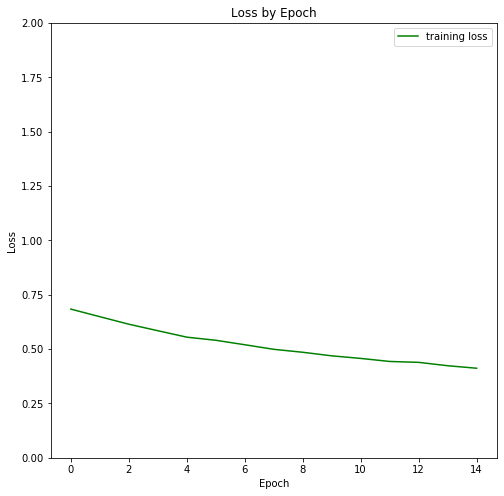

In [24]:
# plot the loss
#took it from workshop
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='training loss', color='green')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 2])
plt.legend(loc='upper right')

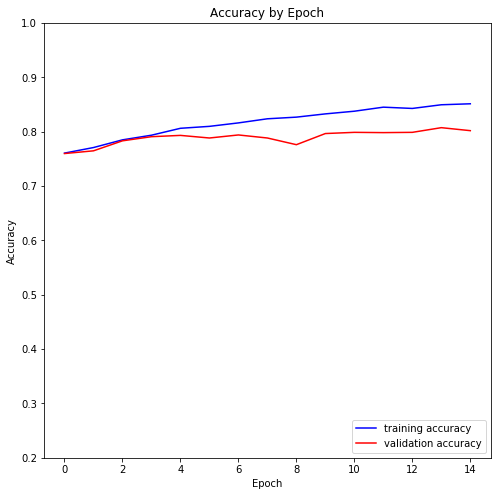

In [25]:
# plot the acccuracy
#took it from workshop

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='training accuracy',color='blue')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy',color='red')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1.])
plt.legend(loc='lower right')

In [26]:
#took it from the workshop
#evaluation

test_evaluation = model.evaluate(x_test, y_test)
test_loss = test_evaluation[0]
test_acc = test_evaluation[1]

print ('\ntest loss: ',test_loss)
print ('test acc:  ', test_acc)
print ('errors:  ', int(10000*(1-test_acc)))

10000/10000 [==============================] - 7s 711us/step

test loss:  0.6177985698461532
test acc:   0.801800012588501
errors:   1981


In [27]:
#save the trained network and weight
model_save= model.to_json()
file = Path("model_save.json")
file.write_text(model_save)
model.save_weights("trained_model.h5")

In [28]:
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

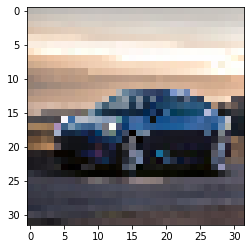

In [35]:
#making a prediction
img = image.load_img("tesla.jpg", target_size=(32, 32))
plt.imshow(img)
plt.show()

In [36]:
test1= image.img_to_array(img)
test_image = np.expand_dims(test1, axis=0)
result = model.predict(test_image)
single_result = result[0]
class_index = int(np.argmax(single_result))
class_name = single_result[class_index]
class_label = class_labels[class_index]
print("This is image is a ",class_label, class_name)

This is image is a  Car 1.0


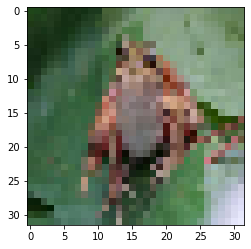

In [37]:
#making a prediction
img = image.load_img("frog.jfif", target_size=(32, 32))
plt.imshow(img)
plt.show()

In [38]:
test1= image.img_to_array(img)
test_image = np.expand_dims(test1, axis=0)
result = model.predict(test_image)
single_result = result[0]
class_index = int(np.argmax(single_result))
class_name = single_result[class_index]
class_label = class_labels[class_index]
print("This is image is a ",class_label, class_name)

This is image is a  Car 1.0


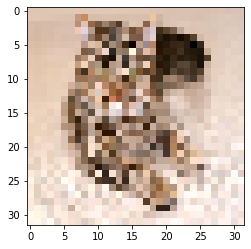

This is image is a  Frog 1.0


In [48]:
#making a prediction
img = image.load_img("cat.jpg", target_size=(32, 32))
plt.imshow(img)
plt.show()
test1= image.img_to_array(img)
test_image = np.expand_dims(test1, axis=0)
result = model.predict(test_image)
single_result = result[0]
class_index = int(np.argmax(single_result))
class_name = single_result[class_index]
class_label = class_labels[class_index]
print("This is image is a ",class_label, class_name)

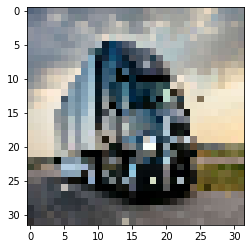

This is image is a  Truck 1.0


In [51]:
#making a prediction
img = image.load_img("truck.jpg", target_size=(32, 32))
plt.imshow(img)
plt.show()
test1= image.img_to_array(img)
test_image = np.expand_dims(test1, axis=0)
result = model.predict(test_image)
single_result = result[0]
class_index = int(np.argmax(single_result))
class_name = single_result[class_index]
class_label = class_labels[class_index]
print("This is image is a ",class_label, class_name)

In [ ]:
!tensorboard --logdir logs

TensorBoard 1.15.0 at http://tensorflow:6006/ (Press CTRL+C to quit)
